In [52]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("acidentes2022.csv", sep=";", on_bad_lines="skip")

In [53]:
# Exibindo todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

In [54]:
df.head(2) #exibe os 5 primeiros ou o parametro que foi passado (no caso 2)

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,"202200001,0",2022-01-01,NaN,COM VÍTIMA,FINALIZADA,JORDÃO,AV MARIA IRENE,"130,0",NaN,NaN,JORDÃO,NaN,SUBURBIO,COLISÃO FRONTAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,0",Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN
1,"202200007,0",2022-01-01,NaN,SEM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,NaN,NaN,LADO OPOSTO AO NÚMERO 4728,IMBIRIBEIRA,"471,0",CIDADE,COLISÃO TRASEIRA,"2,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN


In [55]:
df.columns

Index(['Protocolo', 'data', 'hora', 'natureza', 'situacao', 'bairro',
       'endereco', 'numero', 'detalhe_endereco_acidente', 'complemento',
       'bairro_cruzamento', 'num_semaforo', 'sentido_via', 'tipo', 'auto',
       'moto', 'ciclom', 'ciclista', 'pedestre', 'onibus', 'caminhao',
       'viatura', 'outros', 'vitimas', 'vitimasfatais', 'acidente_verificado',
       'tempo_clima', 'situacao_semaforo', 'sinalizacao', 'condicao_via',
       'conservacao_via', 'ponto_controle', 'situacao_placa',
       'velocidade_max_via', 'mao_direcao', 'divisao_via1', 'divisao_via2',
       'divisao_via3'],
      dtype='object')

In [56]:
df.dtypes #tipo de dados

Protocolo                     object
data                          object
hora                         float64
natureza                      object
situacao                      object
bairro                        object
endereco                      object
numero                        object
detalhe_endereco_acidente     object
complemento                   object
bairro_cruzamento             object
num_semaforo                  object
sentido_via                   object
tipo                          object
auto                          object
moto                          object
ciclom                        object
ciclista                      object
pedestre                      object
onibus                        object
caminhao                      object
viatura                       object
outros                        object
vitimas                       object
vitimasfatais                 object
acidente_verificado           object
tempo_clima                   object
s

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Protocolo                  2669 non-null   object 
 1   data                       2669 non-null   object 
 2   hora                       0 non-null      float64
 3   natureza                   2669 non-null   object 
 4   situacao                   2669 non-null   object 
 5   bairro                     2659 non-null   object 
 6   endereco                   2663 non-null   object 
 7   numero                     1501 non-null   object 
 8   detalhe_endereco_acidente  1013 non-null   object 
 9   complemento                2514 non-null   object 
 10  bairro_cruzamento          2659 non-null   object 
 11  num_semaforo               631 non-null    object 
 12  sentido_via                1552 non-null   object 
 13  tipo                       2563 non-null   objec

In [58]:
df["vitimas"] = df["vitimas"].str.replace(",",".").astype(float)

In [59]:
df.dtypes

Protocolo                     object
data                          object
hora                         float64
natureza                      object
situacao                      object
bairro                        object
endereco                      object
numero                        object
detalhe_endereco_acidente     object
complemento                   object
bairro_cruzamento             object
num_semaforo                  object
sentido_via                   object
tipo                          object
auto                          object
moto                          object
ciclom                        object
ciclista                      object
pedestre                      object
onibus                        object
caminhao                      object
viatura                       object
outros                        object
vitimas                      float64
vitimasfatais                 object
acidente_verificado           object
tempo_clima                   object
s

In [60]:
df["vitimas"].sum()

np.float64(2460.0)

In [61]:
df["vitimasfatais"] = df["vitimasfatais"].str.replace(",",".").astype(float)

In [62]:
df["vitimasfatais"].sum()

np.float64(25.0)

In [63]:
df["data"] = pd.to_datetime(df["data"])
max(df["data"])

Timestamp('2022-12-31 00:00:00')

In [64]:
df.dtypes

Protocolo                            object
data                         datetime64[ns]
hora                                float64
natureza                             object
situacao                             object
bairro                               object
endereco                             object
numero                               object
detalhe_endereco_acidente            object
complemento                          object
bairro_cruzamento                    object
num_semaforo                         object
sentido_via                          object
tipo                                 object
auto                                 object
moto                                 object
ciclom                               object
ciclista                             object
pedestre                             object
onibus                               object
caminhao                             object
viatura                              object
outros                          

In [65]:
df["tipo"].unique()#retornando valores unicos de uma coluna

array(['COLISÃO FRONTAL', 'COLISÃO TRASEIRA', 'COLISÃO LATERAL',
       'CAPOTAMENTO', nan, 'COLISÃO TRANSVERSAL',
       'ATROPELAMENTO DE PESSOA', 'CHOQUE', 'COLISÃO COM CICLISTA',
       'QUEDA', 'TOMBAMENTO', 'ATROPELAMENTO DE ANIMAL', 'ENGAVETAMENTO',
       'RENDIÇÃO', 'OUTROS', 'PROTESTO', 'APOIO EMLURB', 'MONITORAMENTO',
       'FISCALIZAÇÃO'], dtype=object)

In [66]:
df["tipo"].nunique() #retornando o total de valores unicos de uma coluna

18

In [67]:
df.isnull().sum() #verificação de dados nulos

Protocolo                       0
data                            0
hora                         2669
natureza                        0
situacao                        0
bairro                         10
endereco                        6
numero                       1168
detalhe_endereco_acidente    1656
complemento                   155
bairro_cruzamento              10
num_semaforo                 2038
sentido_via                  1117
tipo                          106
auto                            0
moto                            0
ciclom                          0
ciclista                        0
pedestre                        0
onibus                          0
caminhao                        0
viatura                         0
outros                          0
vitimas                         0
vitimasfatais                   0
acidente_verificado           577
tempo_clima                   558
situacao_semaforo             579
sinalizacao                   590
condicao_via  

In [68]:
round(df.isnull().mean()*100, 2) #percentual de dados nulos

Protocolo                      0.00
data                           0.00
hora                         100.00
natureza                       0.00
situacao                       0.00
bairro                         0.37
endereco                       0.22
numero                        43.76
detalhe_endereco_acidente     62.05
complemento                    5.81
bairro_cruzamento              0.37
num_semaforo                  76.36
sentido_via                   41.85
tipo                           3.97
auto                           0.00
moto                           0.00
ciclom                         0.00
ciclista                       0.00
pedestre                       0.00
onibus                         0.00
caminhao                       0.00
viatura                        0.00
outros                         0.00
vitimas                        0.00
vitimasfatais                  0.00
acidente_verificado           21.62
tempo_clima                   20.91
situacao_semaforo           

In [69]:
#df.dropna(inplace=True) Apaga todas as linhas com valores nulos
#df.dropna(subset=["bairro"], inplace=True)  apaga linhas com valores ausentes de uma coluna em especifico
df["hora"] = df["hora"].fillna(0) #preenchendo todos os vaalores nulos

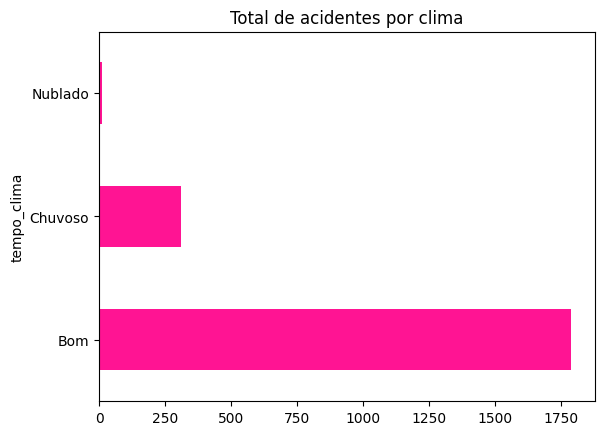

In [70]:
df["tempo_clima"].value_counts().plot.barh(title="Total de acidentes por clima", color="#ff1493"); #total de acidentes por tempo clima

In [71]:
clima = df["tempo_clima"].value_counts()
clima.values

array([1789,  309,   13])

In [72]:
fig = px.bar(clima, x=clima.index, y=clima.values, text=clima.values, color_discrete_sequence=["red"])
fig.update_layout(title_text= "Total de Acidentes por Clima", title_x=0.5)
fig.show()

In [73]:
top_10 = df["bairro"].value_counts().head(10).reset_index()
top_10.sort_values(by="count", ascending=True)
top_10

,bairro,count
0,BOA VIAGEM,301
1,SANTO AMARO,141
2,IMBIRIBEIRA,140
3,BOA VISTA,94
4,MADALENA,88
5,AFOGADOS,86
6,CASA AMARELA,83
7,CORDEIRO,72
8,AREIAS,71
9,PINA,69


In [74]:
fig = px.bar(top_10, x="count", y="bairro", text="count", color_discrete_sequence=["red"])
fig.update_layout(title_text= "Top 10 por Bairro", title_x=0.5)
fig.show()

In [75]:
tipo_acidente = df["tipo"].value_counts().head().reset_index()
tipo_acidente

,tipo,count
0,COLISÃO LATERAL,838
1,COLISÃO TRASEIRA,483
2,COLISÃO FRONTAL,312
3,COLISÃO TRANSVERSAL,306
4,ATROPELAMENTO DE PESSOA,203


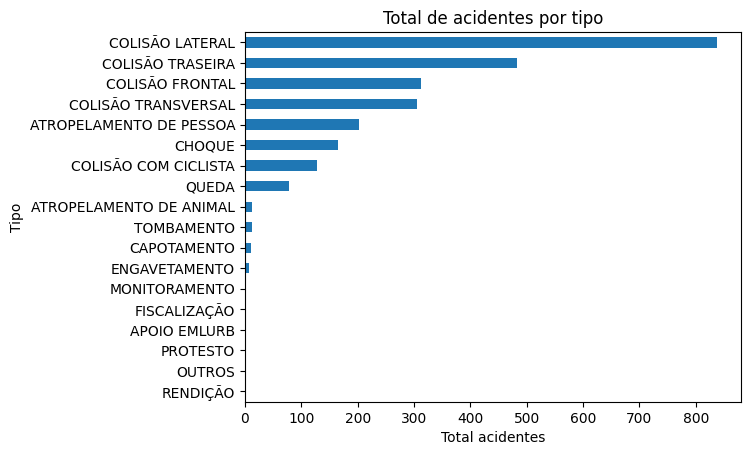

In [76]:
df["tipo"].value_counts(ascending=True).plot.barh(title="Total de acidentes por tipo")
plt.xlabel("Total acidentes")
plt.ylabel("Tipo");

In [77]:
#%%time
#df.loc[df["tipo"] == "COLISÃO LATERAL"]

In [78]:
lateral = df[df["tipo"] == "COLISÃO LATERAL"]
lateral.to_excel("colisao_lateral.xlsx", index=False)  #salva arquivo em excel

In [ ]:
df[(df["tipo"] == "COLISÃO LATERAL") & (df["bairro"] == "BOA VIAGEM")] #AND


In [ ]:
df[(df["tipo"] == "COLISÃO LATERAL") | (df["bairro"] == "BOA VIAGEM")] #OU


In [81]:
tipo = ["APOIO EMLURB", "FISCALIZAÇÃO", "MONITORAMENTO", "PROTESTO", "RENDIÇÃO"]

In [ ]:
df[~df["tipo"].isin(tipo)] #o "~" entra como negação e retorna toda a lista exceto os itens da variavel tipo

In [83]:
df.groupby("tipo")["vitimas"].sum().to_frame().sort_values(by="vitimas", ascending=False)

,vitimas
tipo,
COLISÃO LATERAL,818.0
COLISÃO TRASEIRA,409.0
COLISÃO TRANSVERSAL,334.0
COLISÃO FRONTAL,318.0
ATROPELAMENTO DE PESSOA,231.0
COLISÃO COM CICLISTA,142.0
QUEDA,88.0
CHOQUE,85.0
ENGAVETAMENTO,10.0


In [84]:
df.groupby("tipo")["vitimasfatais"].sum().to_frame().sort_values(by="vitimasfatais", ascending=False).head(10)


,vitimasfatais
tipo,
CHOQUE,6.0
ATROPELAMENTO DE PESSOA,5.0
TOMBAMENTO,4.0
COLISÃO TRASEIRA,3.0
COLISÃO LATERAL,3.0
QUEDA,2.0
COLISÃO TRANSVERSAL,1.0
COLISÃO COM CICLISTA,1.0
ATROPELAMENTO DE ANIMAL,0.0


In [85]:
(df["data"].dt.month).value_counts()

data
8     258
12    254
9     253
10    251
11    239
7     219
6     217
1     211
5     200
3     193
2     188
4     186
Name: count, dtype: int64

In [86]:
df["Mes_acidente"] = df["data"].dt.month  #criando uma nova coluna
df.sample(2)

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3,Mes_acidente
2112,"202225330,0",2022-10-25,0.0,COM VÍTIMA,FINALIZADA,IMBIRIBEIRA,AV MARECHAL MASCARENHAS DE MORAES,"3402,0",NaN,SAMIS CLUB / SUPERMERCADO DESCONTÃO,IMBIRIBEIRA,NaN,SUBURBIO,COLISÃO COM CICLISTA,"0,0","0,0","0,0","1,0","0,0","0,0","1,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,60 km/h,Única,Faixa contínua,NaN,NaN,10
1440,"202217865,0",2022-08-05,0.0,COM VÍTIMA,FINALIZADA,IPUTINGA,AV CAXANGA,NaN,NaN,"EM FRENTE AO GOLF CLUB, SENT. CIDADE",IPUTINGA,NaN,NaN,COLISÃO LATERAL,"0,0","1,0","0,0","0,0","0,0","1,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Chuvoso,Não existe,Perfeito estado,Molhada,Perfeito estado,Não existe,Não há placas,60 km/h,Dupla,Canteiro central,NaN,NaN,8


In [87]:
total_mes = df["Mes_acidente"].value_counts().reset_index().sort_values(by="Mes_acidente")
total_mes
#print(df.columns)

,Mes_acidente,count
7,1,211
10,2,188
9,3,193
11,4,186
8,5,200
6,6,217
5,7,219
0,8,258
2,9,253
3,10,251


In [88]:
fig = px.line(total_mes, x="Mes_acidente", y="count", title="Total de acidentes por mês.",
               markers=True, template="plotly_dark", text="count")
fig.show()

In [89]:
def tevevitima(coluna):
    if coluna == 0.0:
        return "Não houve vítima."
    else:
        return "Houve vítima"

In [90]:
#df["Teve_vitima"] = ""

#for index, row in df.iterrows():
#    if row["vitimas"] == 0:
#        df.at[index, "Teve_vitima"] ="Não houve vitima"
#    else:
#        df.at[index, "Teve_vitima"] ="Houve vitima"

#forma alternativa de incluir a função

In [91]:
df["Teve_vitima"] = df["vitimas"].apply(tevevitima) #criando nova coluna e usando a função

In [92]:
df.sample(2)

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3,Mes_acidente,Teve_vitima
2225,"202226463,0",2022-11-07,0.0,COM VÍTIMA,CANCELADA,BEBERIBE,AV BEBERIBE,"487,0",NaN,NaN,BEBERIBE,NaN,NaN,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,Houve vítima
2256,"202226832,0",2022-11-11,0.0,COM VÍTIMA,FINALIZADA,DOIS UNIDOS,AV HILDEBRANDO DE VASCONCELOS,"2692,0",NaN,PROXIMO A QURADA DE DOIS UNIDOS,DOIS UNIDOS,NaN,SUBURBIO,COLISÃO TRASEIRA,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Não existe,Não existente,Seca,Perfeito estado,Não existe,Não há placas,NaN,Dupla,Não existe,NaN,NaN,11,Houve vítima


In [93]:
def mes(coluna):
    if coluna == 1:
        return "Janeiro"
    elif coluna == 2:
        return "Fevereiro"
    elif coluna == 3:
        return "Março"
    elif coluna == 4:
        return "Abril"
    elif coluna == 5:
        return "Maio"
    elif coluna == 6:
        return "Junho"
    elif coluna == 7:
        return "Julho"
    elif coluna == 8:
        return "Agosto"
    elif coluna == 9:
        return "Setembro"
    elif coluna == 10:
        return "Outubro"
    elif coluna == 11:
        return "Novembro"
    elif coluna == 12:
        return "Dezembro"
    else:
        return "não é mês"
    

In [94]:
df["Mes_acidente1"] = df["Mes_acidente"].apply(mes)
df.sample(5)

,Protocolo,data,hora,natureza,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3,Mes_acidente,Teve_vitima,Mes_acidente1
1108,"202214000,0",2022-06-18,0.0,COM VÍTIMA,FINALIZADA,IPUTINGA,RUA BOM PASTOR,"126,0",RUA COMENDADOR ALVARES DE CARVALHO,EDIFÍCIO PRAÇA DOS CARVALHOS,IPUTINGA,"254,0",CIDADE,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,NaN,Dupla,Faixa contínua,Faixa seccionada,NaN,6,Houve vítima,Junho
1565,"202219432,0",2022-08-21,0.0,COM VÍTIMA,FINALIZADA,PARNAMIRIM,RUA SEBASTIAO MALTA ARCOVERDE,"223,0",AV PARNAMIRIM,EDF. GENIPABU,PARNAMIRIM,NaN,NaN,COLISÃO TRASEIRA,"5,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de retenção,Não há placas,NaN,Única,Faixa contínua,NaN,NaN,8,Houve vítima,Agosto
2155,"202225719,0",2022-10-29,0.0,COM VÍTIMA,FINALIZADA,SANTO ANTÔNIO,AV GUARARAPES,NaN,RUA DO SOL,EM FRENTE AO CORREIOS,SANTO ANTÔNIO,"14,0",NaN,COLISÃO LATERAL,"1,0","1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",1.0,0.0,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,40 km/h,Dupla,Não existe,NaN,NaN,10,Houve vítima,Outubro
109,"202201139,0",2022-01-17,0.0,COM VÍTIMA,FINALIZADA,IMBIRIBEIRA,RUA ITALIA,NaN,RUA ARQUITETO LUIZ NUNES,AO LADO DO SUPERMERCADO ASSAI,IMBIRIBEIRA,NaN,NaN,COLISÃO FRONTAL,"0,0","0,0","1,0","0,0","0,0","1,0","0,0","0,0","0,0",1.0,0.0,Cruzamento,Bom,Não existe,Incompleta,Seca,Perfeito estado,Não existe,"Placas ""Pare""",NaN,Dupla,Não existe,NaN,NaN,1,Houve vítima,Janeiro
2261,"202226885,0",2022-11-12,0.0,SEM VÍTIMA,FINALIZADA,MADALENA,RUA JOAO IVO DA SILVA,"232,0",RUA RICARDO SALAZAR,NaN,MADALENA,NaN,SUBURBIO,TOMBAMENTO,"1,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,Não houve vítima.,Novembro
